# Analyzing NYC High School Data

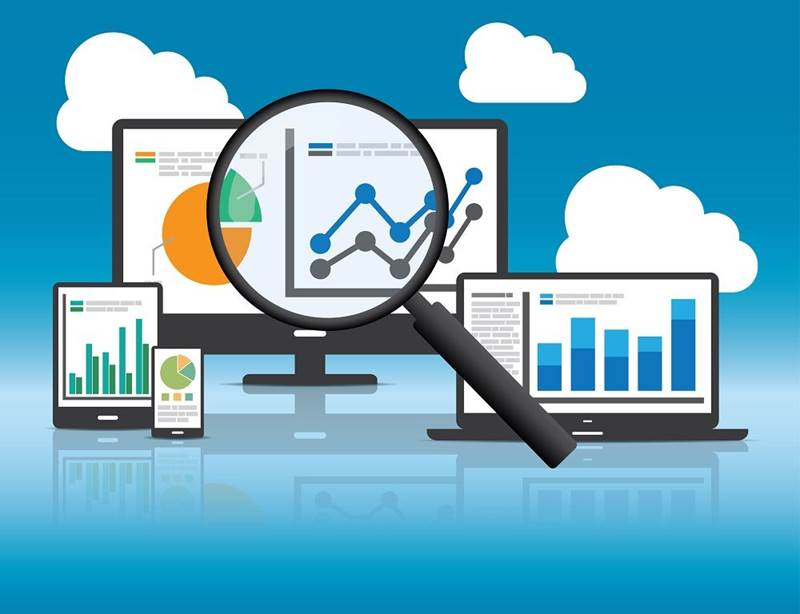

## Introduction 

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests and whether they're unfair to certain groups. For example, New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. 

In this project we will attempt to investigate the correlations between SAT scores and demographic factors in New York City public schools including race, gender, AP exams and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding on admission. 

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the dataset for our project is based on 2,400 total points). 

Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.


New York City makes its data on high school SAT scores available online at https://opendata.cityofnewyork.us/ . The same website has several related datasets covering demographic information and test scores. Here are the links to all of the datasets we'll be using in our full analysis:
- __[Directory of NYC High Schools](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2)__ 
- __[SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)__ - SAT scores for each high school in New York City
- __[School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt)__ - Attendance information for each school in New York City
- __[Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)__ - Information on class size for each school
- __[AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e)__ - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- __[Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a)__ - The percentage of students who graduated, and other outcome information
- __[Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j)__ - Demographic information for each school
- __[School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8)__ - Surveys of parents, teachers, and students at each school


All of these datasets are interrelated. We would need to combine them into a single dataset before we can find any correlations.

## 1. Combining data into a single dataset
### Reading in the Data

In [1]:
import pandas as pd

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

We will read each file into a pandas dataframe and then store all of the dataframes in a dictionary. This should gives us a better way to store them and a quick way to reference them at the later stage.

In [2]:
data = {}
for i in data_files:
    d = pd.read_csv('schools/{}'.format(i))
    key_name = i.replace('.csv', '')  # Add each of the dataframes to the dictionary 'data',             
    data[key_name] = d                # using the base of the filename as the key 
    

What we are most interested in is the SAT dataset, which corresponds to the dictionary key sat_results. This dataset contains the SAT scores for each high school in New York City. We would eventually want to correlate selected information from this dataset with information in the other datasets.

In [3]:
# Exploring the dataframe
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


The DBN appears to be a unique ID for each school. 

Let's explore the other datasets to see if we can gain any insight into how to combine them.

In [4]:
for key in data:
    print(data[key].head())

      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1

Each dataset appears to either have a DBN column or the information we need to create one. That means we can use a DBN column to combine the datasets.

### Reading in the Survey Data

Before we proceed with the merge, we should make sure we have all of the data we want to unify.

We have survey data (survey_all.txt and survey_d75.txt) which we need to include. Those files are in different format. The files are tab delimited and encoded with Windows-1252 encoding. 

We would need to specify the encoding and delimiter to the pandas pandas.read_csv() function to ensure it reads them in properly.

In [5]:
all_survey = pd.read_csv('schools/survey_all.txt', delimiter = '\t', encoding ='windows-1252')
d75_survey = pd.read_csv('schools/survey_d75.txt', delimiter = '\t', encoding ='windows-1252')

survey =  pd.concat([all_survey, d75_survey], axis=0) # combining files into a single dataframe

print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

We would have to filter the data and remove unnecessary columns, based on the data dictionary available at the original download location. The dictionary helps us to determine which columns to use.

In [6]:
survey["DBN"] = survey["dbn"] # converting to uppercase 

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11", 
]
survey = survey.loc[:, survey_fields] 
# filtering 'survey', so it only contains the columns mentioned above

data["survey"] = survey

# exploring results
print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

### Inserting DBN Fields

DBN is the field which we will combine all the datasets upon. However, class_size does not contain this column. Despite this, it contains CSD and SCHOOL CODE columns, where combination of those two is an actual DBN.

In [7]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn'] # creatig new column 'DBN'

def convertion(x):
    if len(str(x)) == 2:
        return str(x)
    if len(str(x)) == 1:
        return str(x).zfill(2)

data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(convertion)
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

# exploring results
print(data['class_size'].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


### Combining the SAT Scores

It should be easier to correlate the score with demographic factors if we add up various SAT score results into one variable. In this case we will be working with one number instead of three different ones (‘SAT Math Avg. Score’, ‘SAT Critical Reading Avg. Score’ and ‘SAT Writing Avg. Score’). 
We should convert the above columns into numeric data types before adding them up.


In [8]:
cols = ['SAT Math Avg. Score', 
        'SAT Critical Reading Avg. Score', 
        'SAT Writing Avg. Score']
for i in cols:
    data['sat_results'][i] = pd.to_numeric(data['sat_results'][i], errors = 'coerce')
    # We use errors="coerce" for the method to treat any invalid strings as missing values

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

# exploring results
print(data['sat_results']['sat_score'].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


### Parsing Geographic Coordinates for Schools
In order to enable us to map the schools and uncover any geographic patterns in the data we should parse the latitude and longitude coordinates for each school. 
We will attempt to extract coordinates using regular expression. 

In [9]:
import re
def lat(x):
    coords = re.findall("\(.+\)", x)
    return coords[0].split(sep = ',')[0].replace('(', '')

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(lat)

def lon(x):
    coords = re.findall("\(.+\)", x)
    return coords[0].split(sep = ',')[1].replace(')', '')

data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(lon)

# converting both coordinates to numeric values 
for i in ['lat', 'lon']:
    data['hs_directory'][i] = pd.to_numeric(data['hs_directory'][i], errors = 'coerce')

# exploring results
print(data['hs_directory'].head())

      dbn                                        school_name       boro  \
0  17K548                Brooklyn School for Music & Theatre   Brooklyn   
1  09X543                   High School for Violin and Dance      Bronx   
2  09X327        Comprehensive Model School Project M.S. 327      Bronx   
3  02M280     Manhattan Early College School for Advertising  Manhattan   
4  28Q680  Queens Gateway to Health Sciences Secondary Sc...     Queens   

  building_code    phone_number    fax_number grade_span_min  grade_span_max  \
0          K440    718-230-6250  718-230-6262              9              12   
1          X400    718-842-0687  718-589-9849              9              12   
2          X240    718-294-8111  718-294-8109              6              12   
3          M520  718-935-3477             NaN              9              10   
4          Q695    718-969-3155  718-969-3552              6              12   

  expgrade_span_min  expgrade_span_max  ...                       pr

### Condensing  Datasets
We now need to condense the ‘class_size’, ‘graduation’ and ‘demographics’ datasets so that each value in the DBN column is unique. If not, we may encounter issues when it comes time to combining the datasets. For example, a single row in the ‘sat_results’ dataset may match multiple rows in the ‘class_size’ dataset, as a result we won’t be able to combine the rows from both datasets. 

To start with we would only want to pick rows where the value in the GRADE column is 09-12. Also it would make sense to select rows only where PROGRAM TYPE is GEN ED, since it is largest category by far. 

In [10]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE '] == '09-12'] 
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

# exploring results
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [11]:
class_size['CORE COURSE (MS CORE and 9-12 ONLY)'].unique()

array(['English 9', 'English 10', 'English 11', 'English 12',
       'Integrated Algebra', 'Geometry', 'Other Math', 'Earth Science',
       'Living Environment', 'Chemistry', 'Physics', 'Other Science',
       'Global History & Geography', 'US History & Government',
       'MS English Core', 'Other English', 'Trigonometry',
       'Participation in Government', 'Math A', 'Economics',
       'Other Social Studies', 'Math B'], dtype=object)

In [12]:
class_size['CORE SUBJECT (MS CORE and 9-12 ONLY)'].unique()

array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

DBN still is not completely unique in 'class_size'. This is due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns. 

Now we can take the average across all of the classes a particular school has to offer. This would provide us with unique DBN values, while also incorporating as much data as possible into the average.

In [13]:
import numpy
grouped = class_size.groupby('DBN')
class_size = grouped.agg(numpy.mean)

# to undo column ‘DBN’ becoming index and no longer appearing as a column
class_size.reset_index(inplace = True)
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


Now we should select rows from 'demographics' where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data. 

In [14]:
demographics = data['demographics']
demographics = demographics[demographics['schoolyear'] == int('20112012')]
data['demographics'] = demographics
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


Next in ‘graduation’ dataset we should pick data from the most recent ‘Cohort’ available, which is 2006. We also prefer data from the full cohort, so we should only pick rows where ‘Demographic’ is ‘Total Cohort’.

In [15]:
data['graduation'] = data['graduation'][data['graduation']['Cohort'] == '2006']
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']
                                        
print(data['graduation'].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
3             78              43                     55.1%                36   
10           124              53                     42.7%                42   
17            90              70                     77.8%                67   
24            84              47                       56%                40   
31           193             105                     54.4%                91   

   Total Regents - % of cohort Total Regents - % of grads  ...  \
3       

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools. To determine this, we'll need to convert the AP exam scores in the ‘ap_2010’ data set to numeric values first.

In [16]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for x in cols:
    data['ap_2010'][x] = pd.to_numeric(data['ap_2010'][x], errors = 'coerce')
    
# exploring results
data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

### Combining the Data

We will be using the 'DBN' column to identify matching rows across datasets. We may need to use different merge strategies with different datasets. Some of the datasets have a lot of missing DBN values. This makes a left join more appropriate, because we wouldn’t want to lose too many rows when we merge.

Most of our analysis would be impossible if a significant number of rows was missing from ‘demographics’, for example. Therefore, we'll do an inner join to avoid missing data in these columns.


In [17]:
combined = data["sat_results"].merge(data['ap_2010'], on="DBN", how = 'left')
combined = combined.merge(data['graduation'], on="DBN", how = 'left')
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


In [18]:
combined.shape

(479, 33)

In [19]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for x in to_merge:
    combined = combined.merge(data[x], on="DBN", how="inner")

print(combined.head())
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

In [20]:
# filling in missing values
means = combined.mean()
combined = combined.fillna(means)
combined = combined.fillna(0)

We should add a new column to the dataset that specifies the school district.

In [21]:
def extract (string):
    return string[0:2]

combined['school_dist'] = combined['DBN'].apply(extract)
combined['school_dist'].head() # verifying results

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

## 2. Finding Correlations and Plotting Data
Next thing we should do is find any correlations between columns and ‘sat_score’. This should help us determine which columns might be interesting to plot out or investigate further.

Correlations can tell us how closely related two columns are. We will be using the r value, also called Pearson's correlation coefficient, to measure how closely two sequences of numbers are correlated.

In [22]:
correlations = combined.corr()
correlations = correlations['sat_score']
pd.set_option('max_rows', None)
print(correlations.sort_values(ascending = False))

sat_score                               1.000000
SAT Writing Avg. Score                  0.987771
SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
white_per                               0.620718
asian_per                               0.570730
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
asian_num                               0.475445
Number of Exams with scores 3 4 or 5    0.463245
white_num                               0.449559
N_s                                     0.423463
N_p                                     0.421530
total_students                          0.407827
NUMBER OF STUDENTS / SEATS FILLED       0.394626
female_num                              0.388631
AVERAGE CLASS SIZE                      0.381014
total_enrollment                        0.367857
NUMBER OF SECTIONS                      0.362673
aca_s_11                                0.339435
saf_s_11            

### Total enrollment correlation
Let’s explore ‘total_enrollment’ further and make a scatterplot of it vs ‘sat_score’.

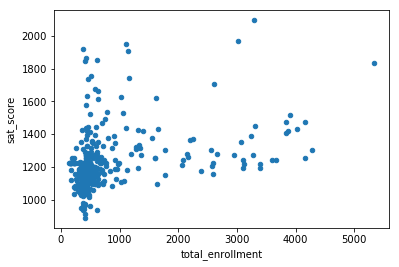

In [23]:
%matplotlib inline 
import matplotlib.pyplot as plt

combined.plot(x = 'total_enrollment', y = 'sat_score', kind = 'scatter')
plt.show()

It appears there is not a strong correlation between ‘sat_score’ and ‘total_enrollment’. 
However, there's an interesting cluster of points at the bottom left where ‘total_enrollment’ and ‘sat_score’ are both low. This cluster may be what is making the r value so high. We should extract the names of the schools in this cluster and attempt to research them further.

In [24]:
low_enrollment = combined[combined['total_enrollment'] <= 1000]
low_enrollment = combined[combined['sat_score'] <= 1000]
low_enrollment['School Name'].tolist()

['INTERNATIONAL COMMUNITY HIGH SCHOOL',
 0,
 'BRONX INTERNATIONAL HIGH SCHOOL',
 'KINGSBRIDGE INTERNATIONAL HIGH SCHOOL',
 'INTERNATIONAL SCHOOL FOR LIBERAL ARTS',
 0,
 'HIGH SCHOOL OF WORLD CULTURES',
 'BROOKLYN INTERNATIONAL HIGH SCHOOL',
 'INTERNATIONAL HIGH SCHOOL AT PROSPECT',
 'IT TAKES A VILLAGE ACADEMY',
 'MULTICULTURAL HIGH SCHOOL',
 'PAN AMERICAN INTERNATIONAL HIGH SCHOO']

### Correlation of english language learner's students  
Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ‘ell_percent’ that correlates strongly with ‘sat_score’, rather than ‘total_enrollment’. To explore this relationship further, let's plot out ‘ell_percent’ vs ‘sat_score’.

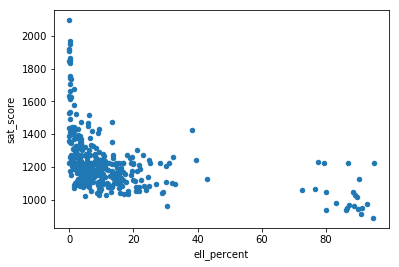

In [25]:
combined.plot.scatter(x= 'ell_percent', y = 'sat_score')
plt.show()

To make very granular statistics easier to read we should  aggregate them.  In our case we can aggregate by district, which should enable us to understand how ‘ell_percent’ varies district-by-district instead of the illegibly granular school-by-school variation.

In [26]:
districts = combined.groupby('school_dist').agg(numpy.mean)
districts.reset_index(inplace = True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,12.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,12.0,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,12.0,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,-73.949251


### Correlations between survey fields and SAT score

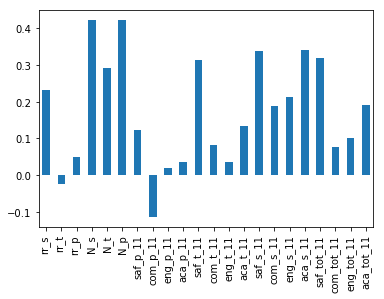

In [27]:
survey_fields.remove('DBN') # it is not a useful numerical value for correlation
combined.corr()['sat_score'][survey_fields].plot.bar()
plt.show()

We can see high correlation between number of teacher, student and parent respondents (N_t, N_s and N_p) and SAT score. However, in contrary the response  of parents, teachers (rr_p, rr_t) is very little correlated, which is an interesting observation. The correlation of response rate of students with SAT is larger, it may indicate that students performing well on exams are more likely to participate in surveys.  

In addition there is a correlation between how students and teachers perceive safety (saf_t_11 and saf_s_11) and SAT score. This shows the importance of safe environment  for the best academic results.  

Another interesting correlation is academic expectations score based on student responses (aca_s_11), which indicates how the student perceives academic standards with SAT score. This also is in contrast with expectation score based on parents responses (aca_p11) and less so with teacher’s expectations (aca_t_11). 

### Correlations between safety and SAT score
Now we will try to explore the relationship between safety and SAT score in more details and try to establish which schools have low safety scores.

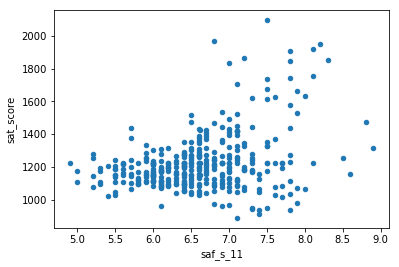

In [28]:
combined.plot.scatter(x= 'saf_s_11', y = 'sat_score')
plt.show()

We can see a correlation between SAT scores and safety, even though it is not very distinct. It appears there are several schools with high SAT results and high safety scores. There are also a number of schools with low safety scores and low SAT scores. There is no school with a safety score lower than 6.5 that has a SAT score higher than 1500 or thereabout.

Below we compute the average safety score for each borough.

In [29]:
boroughs = combined.groupby('boro').agg(numpy.mean)['saf_s_11']
print(boroughs)

boro
Bronx            6.606577
Brooklyn         6.370755
Manhattan        6.831370
Queens           6.721875
Staten Island    6.530000
Name: saf_s_11, dtype: float64


### Correlations between race and SAT score

We shall try to determine if there is a correlation between racial differences and SAT performance.

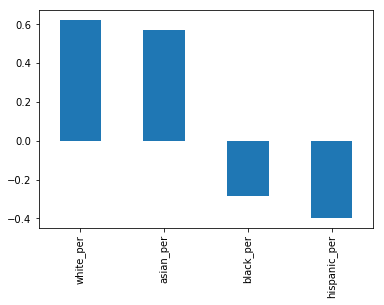

In [30]:
combined_fileds = ['white_per', 'asian_per', 'black_per', 'hispanic_per']
combined.corr()['sat_score'][combined_fileds].plot.bar()
plt.show()

It appears that the higher percentage of white or Asian students correlates positively with SAT scores. On contrary the higher percentage of black or Hispanic students correlates negatively with SAT score. 

One of the reasons could be a lack of funding for schools in areas where there are higher number of black or Hispanic students. 

We should further explore correlation between schools with low SAT scores and high percentage of Hispanic students

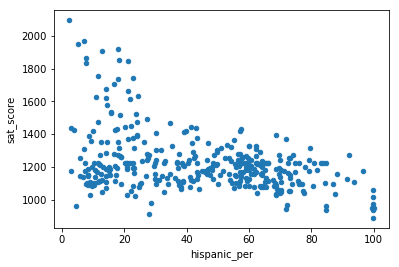

In [31]:
combined.plot.scatter(x= 'hispanic_per', y = 'sat_score')
plt.show()

The plot does not display any obvious correlation. 
Let’s look into schools with a 'hispanic_per' greater than 95%.


In [32]:
print(combined[combined['hispanic_per']>95]['School Name'])

44             MANHATTAN BRIDGES HIGH SCHOOL
82                                         0
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIE
125                                        0
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


The schools listed above appear to primarily serve recent immigrants to the U.S. These schools have many students who are learning English, which would explain the lower SAT scores.

Now let’s find schools with a ‘hispanic_per’ less than 10% and an average SAT score greater than 1800.

In [33]:
print(combined[(combined['hispanic_per']<10) & (combined['sat_score']>1800)]['SCHOOL NAME']) 

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Many of the schools above are specialized in science and technology. These schools receive extra funding and only admit students through the entrance exam. It partially explains why their students appear to have better SAT results. Although it does not explain the negative correlation with ‘hispanic_per’.

### Correlations between gender and SAT score
Now let’s determine if there is a correlation between gender differences and SAT performance.

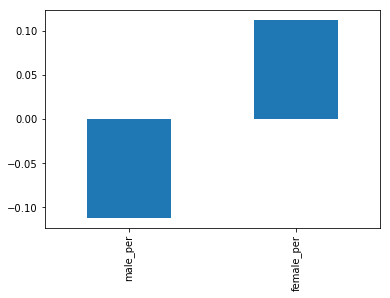

In [34]:
combined.corr()['sat_score'][['male_per', 'female_per']].plot.bar()
plt.show()

There is a visible positive correlation between female students and SAT score. Furthermore, there is a negative correlation between male students and SAT results. Although, none of those correlations are significant. 

Let’s investigate schools with high SAT scores and a high ‘female_per’.

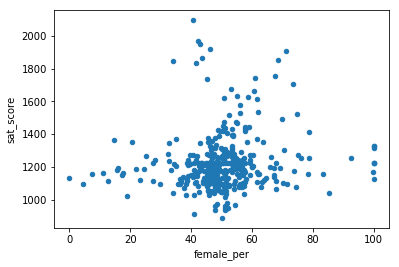

In [35]:
combined.plot.scatter(x= 'female_per', y = 'sat_score')
plt.show()

There does not appear to be a strong correlation. However, there is a cluster of schools with high ‘female_per’ (above 60) and SAT scores. Let’s explore those a bit further.  

In [36]:
print(combined[(combined['female_per']>60) & (combined['sat_score']>1700)]['SCHOOL NAME']) 

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


 The schools seem to be very selective liberal arts schools with high academic standards.

### Correlation between Advanced Placement (AP) exams and SAT scores
In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. It is expected that the number of students who took AP exams would be highly correlated with the school's SAT scores. We should explore this correlation further.

The ‘total_enrollment’ is highly correlated with ‘sat_score’, as a result we don't want to have biased results. As an option, let’s l look at the percentage of students in each school who took at least one AP exam.


In [37]:
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']

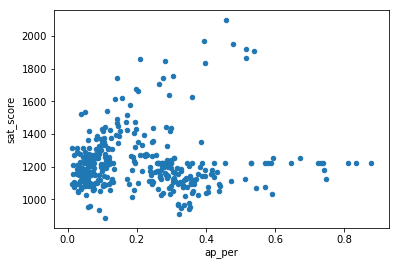

In [38]:
combined.plot.scatter(x= 'ap_per', y = 'sat_score')
plt.show()

There appears to be a correlation between students who take AP exam and SAT score, although it is not very strong. 

## Conclusion 
In this project we have managed to combine data from various datasets into single dataset. This included working with missing values, parsing geographic coordinates, applying different types of merges, condensing datasets, computing averages across data frames.

Following that, we found correlations between demographics and SAT scores. This included finding correlations between SAT scores and safety in schools, race, AP exams. 

Nevertheless, there is evidently room for further analysis. 